In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
df_matches=pd.read_csv('WC-DATA\WorldCupMatches.csv')

In [3]:
df_matches.head()

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13-07-1930,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,...,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13-07-1930,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,...,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14-07-1930,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,...,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14-07-1930,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,...,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15-07-1930,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,...,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [4]:
df_matches.shape

(852, 21)

In [5]:
df_matches.columns

Index(['Year', 'Date', 'Time', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [6]:
df_players=pd.read_csv('WC-DATA\WorldCupPlayers.csv')
df_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [7]:
df_cups=pd.read_csv('WC-DATA\WorldCups.csv')
df_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


In [8]:
## check for null values in all the datasets
print('Null values in matches dataset',df_matches.isnull().sum().sum())
print('Null values in players dataset',df_players.isnull().sum().sum())
print('Null values in cups dataset',df_cups.isnull().sum().sum())

Null values in matches dataset 2
Null values in players dataset 62356
Null values in cups dataset 0


In [9]:
df_matches.isnull().sum()

Year                    0
Date                    0
Time                    0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

The two missing values are in the attendance column of the matches dataset

In [10]:
df_players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

The max number of missing data is in the position and event columns of the data 

In [11]:
df_players.isnull().sum()/df_players.shape[0]

RoundID          0.000000
MatchID          0.000000
Team Initials    0.000000
Coach Name       0.000000
Line-up          0.000000
Shirt Number     0.000000
Player Name      0.000000
Position         0.890350
Event            0.759978
dtype: float64

89% of the total data is missing in the Position column and 76% of the total data is missing from the Event column therefore we can remove the two columns 

In [12]:
df_matches.isnull().sum()

Year                    0
Date                    0
Time                    0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [13]:
df_matches.dropna(inplace=True)  ## dropping the missing values from the matches dataset

In [62]:
df_matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,8.500000e+02,8.500000e+02
mean,1985.021176,1.810588,1.022353,45164.800000,0.710588,0.429412,1.068626e+07,6.078489e+07
std,22.431301,1.612125,1.088853,23485.249247,0.937885,0.691752,2.732359e+07,1.105805e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188250e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.184000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [63]:
df_cups.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,1974.800000,118.950000,21.250000,41.800000,1.872882e+06
std,25.582889,32.972836,7.268352,17.218717,1.071842e+06
min,1930.000000,70.000000,13.000000,17.000000,3.630000e+05
25%,1957.000000,89.000000,16.000000,30.500000,8.748315e+05
50%,1976.000000,120.500000,16.000000,38.000000,1.734864e+06
75%,1995.000000,145.250000,26.000000,55.000000,2.725173e+06
max,2014.000000,171.000000,32.000000,64.000000,3.587538e+06


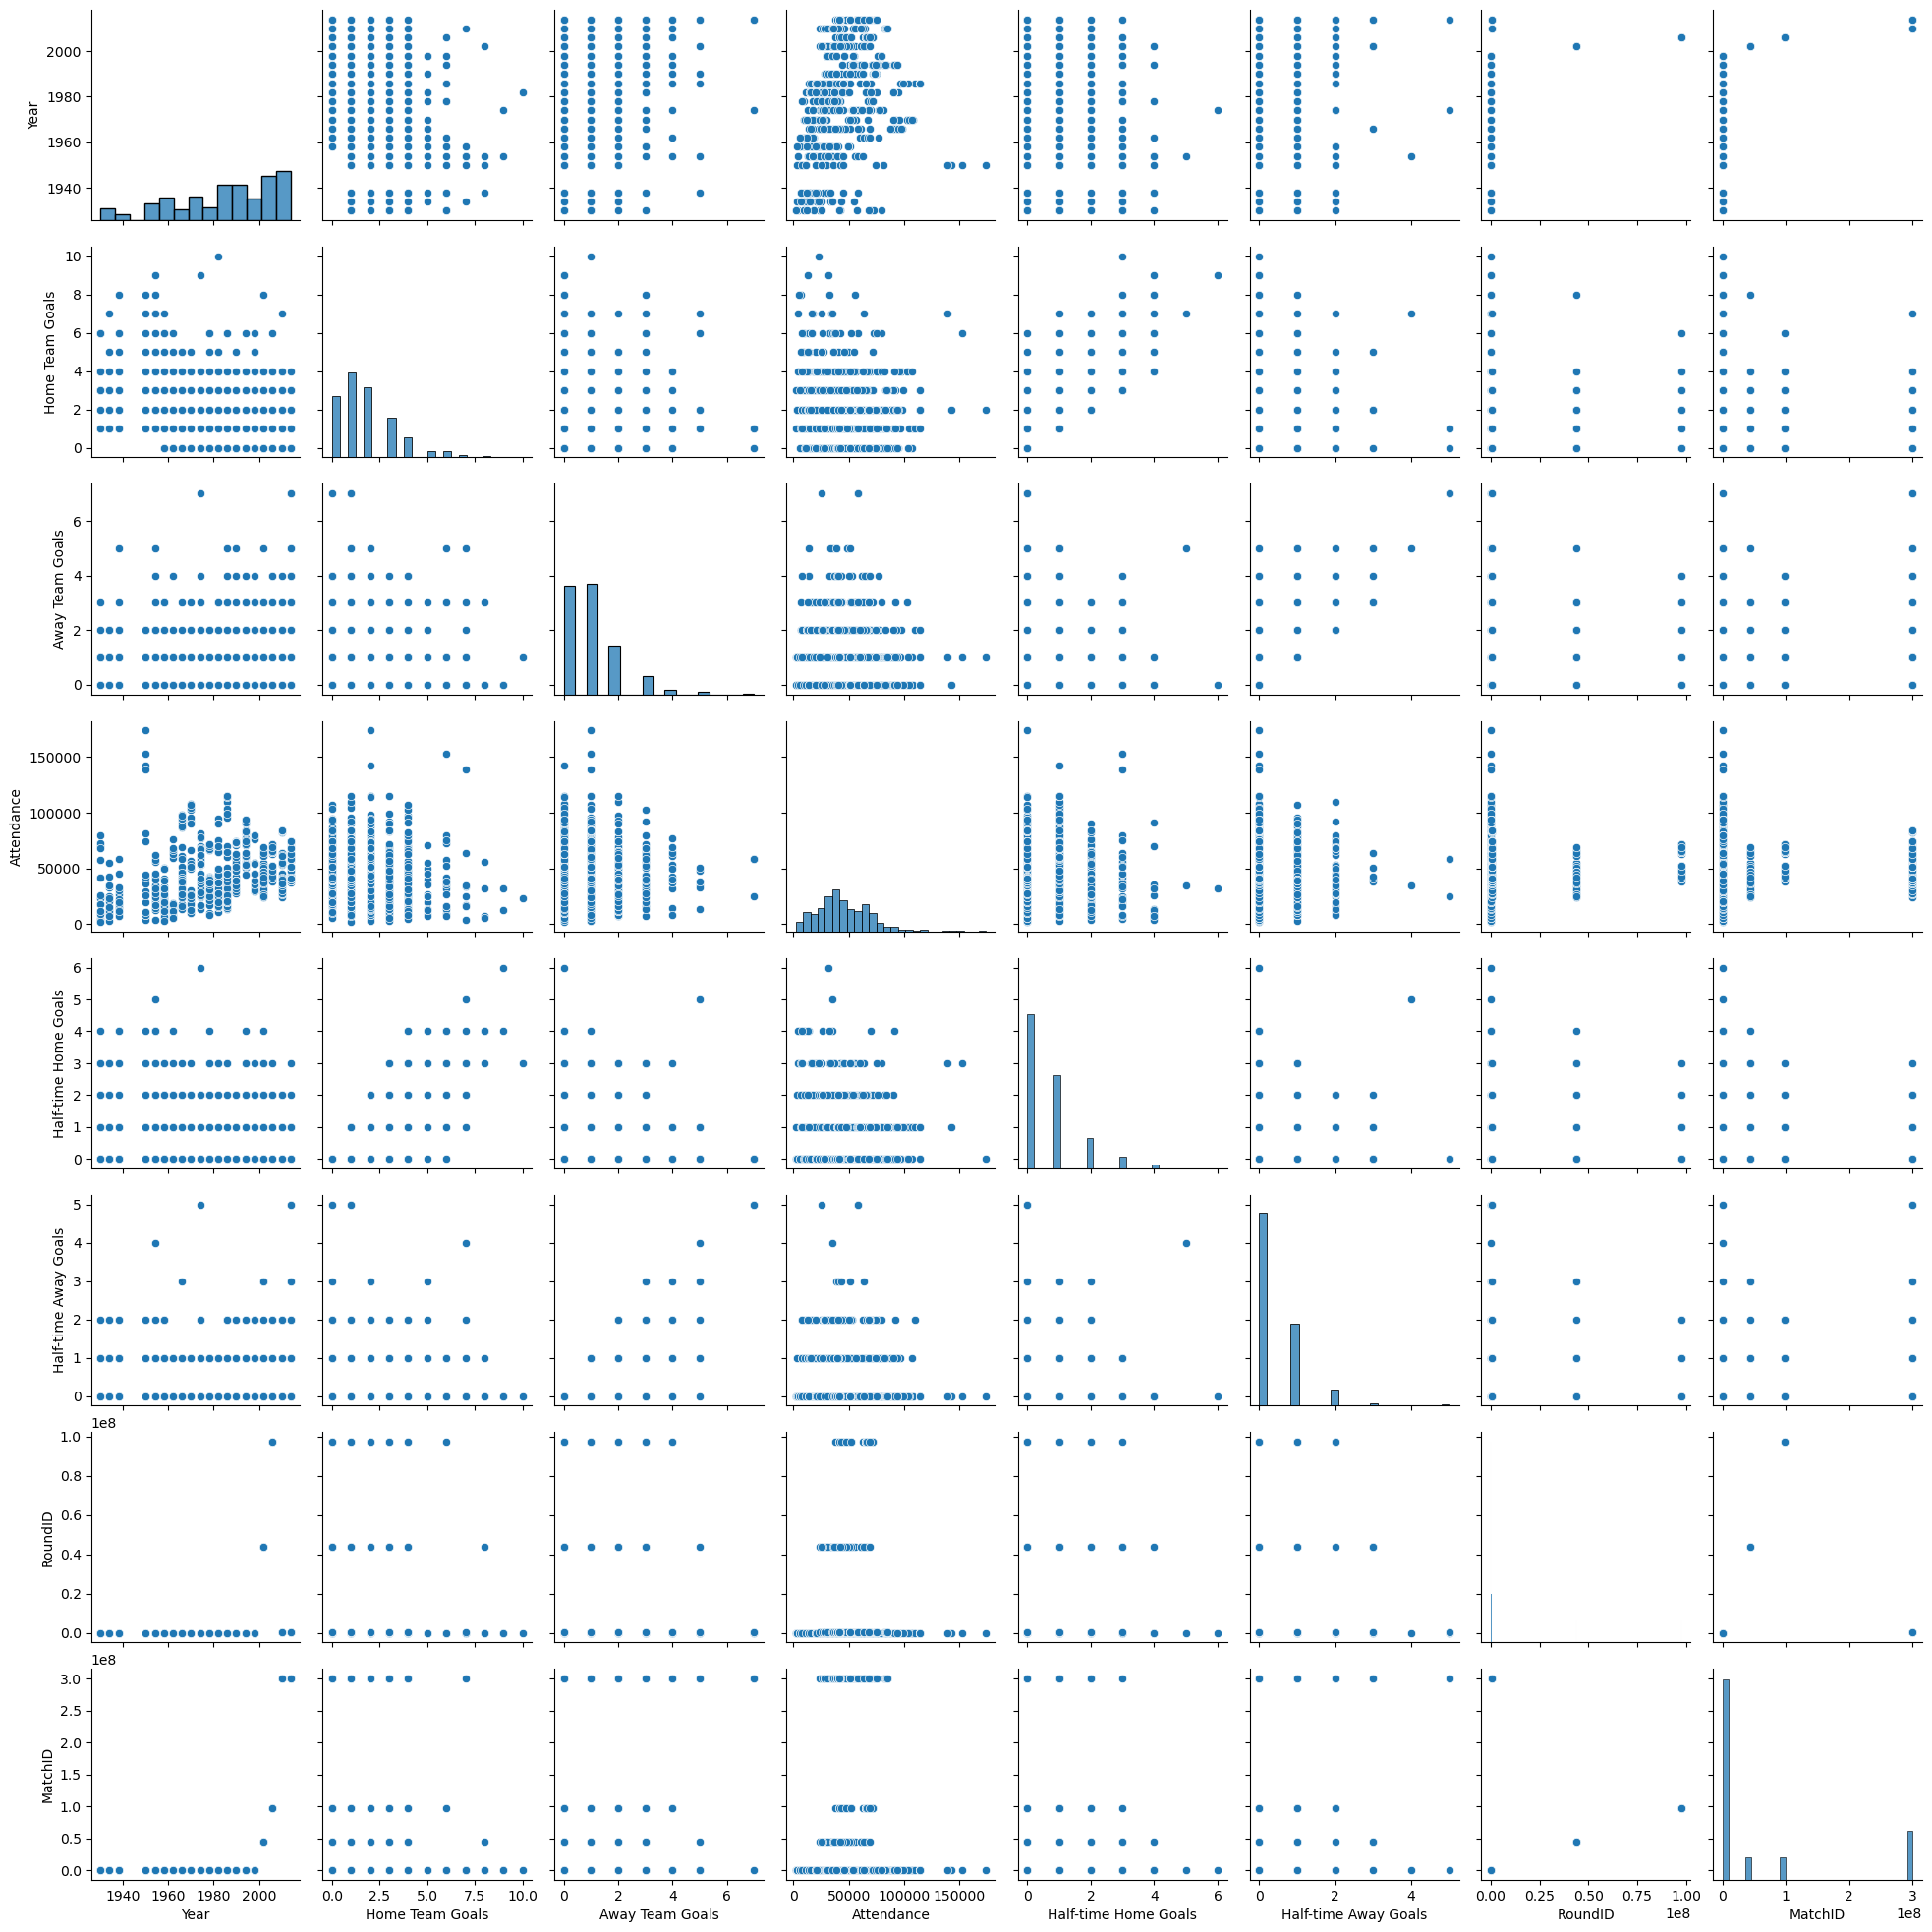

In [14]:
sns.pairplot(df_matches)

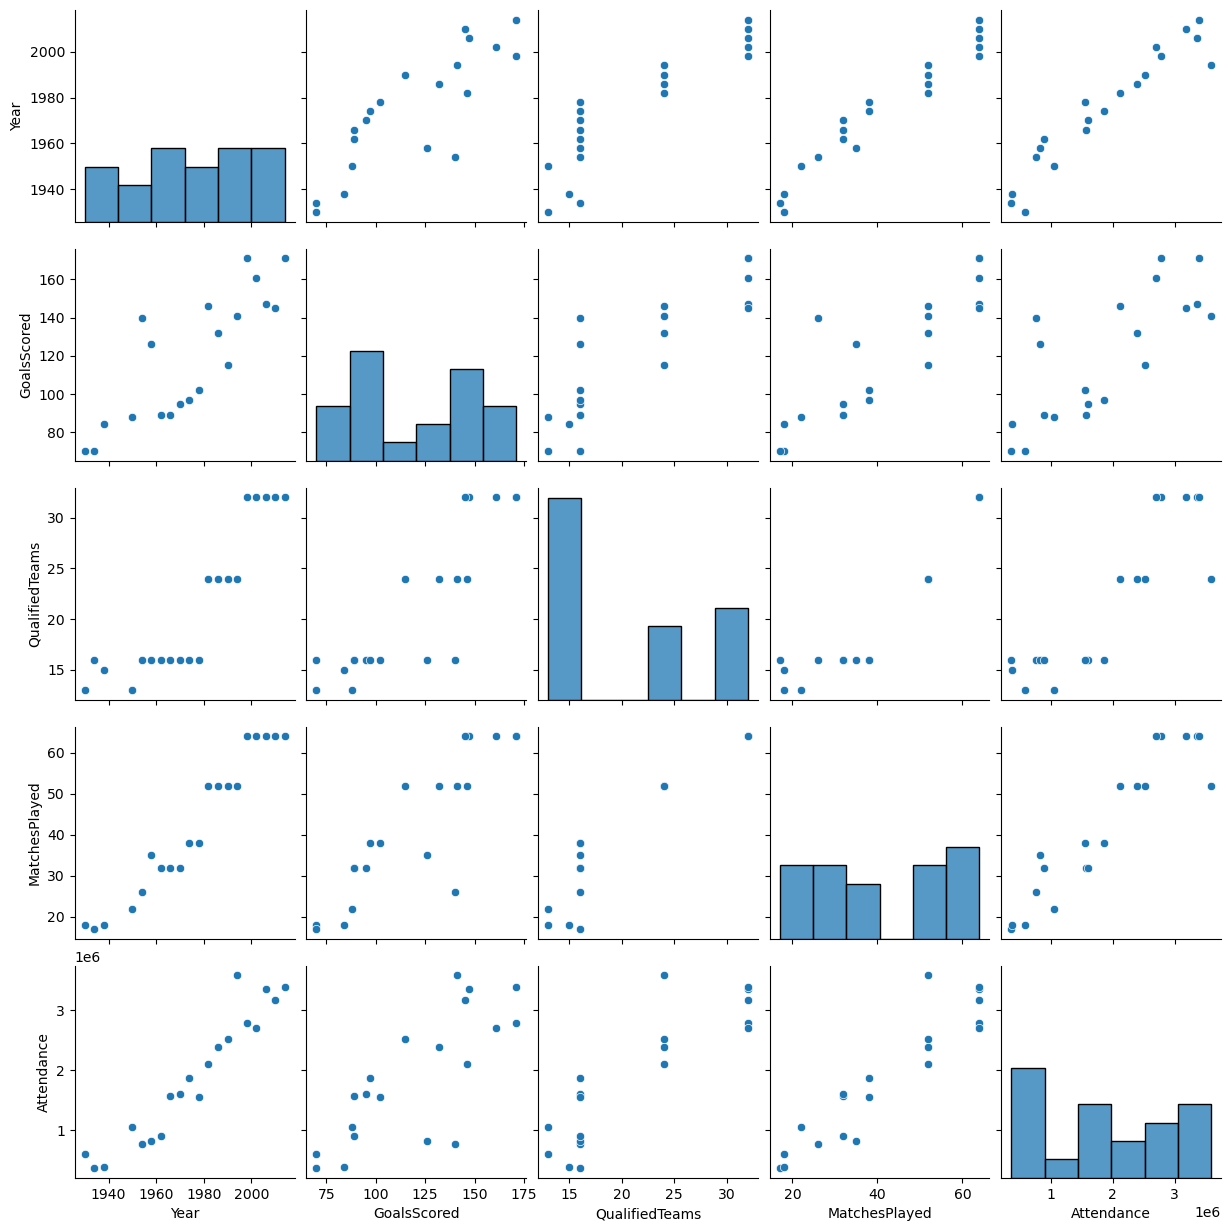

In [59]:
sns.pairplot(df_cups)

In [15]:
df_matches['Home Team Name'].value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 78, dtype: int64

In [16]:
## only one appearance for china 
df_matches[df_matches['Home Team Name']=='China PR']

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
591,2002,04-06-2002,15:30,Group C,Gwangju World Cup Stadium,Gwangju,China PR,0,2,Costa Rica,...,27217.0,0,0,VASSARAS Kyros (GRE),MATOS Carlos (POR),POOL Jaap (NED),43950100,43950012,CHN,CRC


In [17]:
df_matches[df_matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [18]:
wrong_names=list(df_matches[df_matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts().index)
wrong_names

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [19]:
correct_names=[name.split('>')[1] for name in wrong_names]
correct_names

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

We can observe that Germany is named as Germany FR (Federal Republic) which is an old name , Maracan� - Est�dio Jornalista M�rio Filho' and Estadio de maracana are Maracanã Stadium representing the same thing

In [20]:
incorrect_names = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
final_wrong_names=wrong_names+incorrect_names
final_wrong_names

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina',
 'Germany FR',
 'Maracan� - Est�dio Jornalista M�rio Filho',
 'Estadio do Maracana']

In [21]:
correct_names=correct_names+['Germany', 'Maracan Stadium', 'Maracan Stadium']
correct_names

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina',
 'Germany',
 'Maracan Stadium',
 'Maracan Stadium']

In [22]:
for i,name in enumerate(final_wrong_names):
    df_matches.replace(final_wrong_names[i],correct_names[i],inplace=True)
    df_cups.replace(final_wrong_names[i],correct_names[i],inplace=True)
    df_players.replace(final_wrong_names[i],correct_names[i],inplace=True)

In [23]:
df_matches[df_matches['Home Team Name'].str.contains('rn">')]['Home Team Name']

Series([], Name: Home Team Name, dtype: object)

### World Cup Titles

In [24]:
## winner count
winners=df_cups['Winner'].value_counts()
winners

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [25]:
## runner ups
runner_ups=df_cups['Runners-Up'].value_counts()
runner_ups

Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [26]:
## Third place 
third=df_cups['Third'].value_counts()
third

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: Third, dtype: int64

In [27]:
team_data=pd.concat([winners,runner_ups,third],axis=1).fillna(0).astype(int)
team_data.reset_index(inplace=True)

In [28]:
team_data.rename(columns={'index':'Country'},inplace=True)
team_data.head()

,Country,Winner,Runners-Up,Third
0,Brazil,5,2,2
1,Italy,4,2,1
2,Germany,4,4,4
3,Uruguay,2,0,0
4,Argentina,2,3,0


<Figure size 1500x800 with 0 Axes>

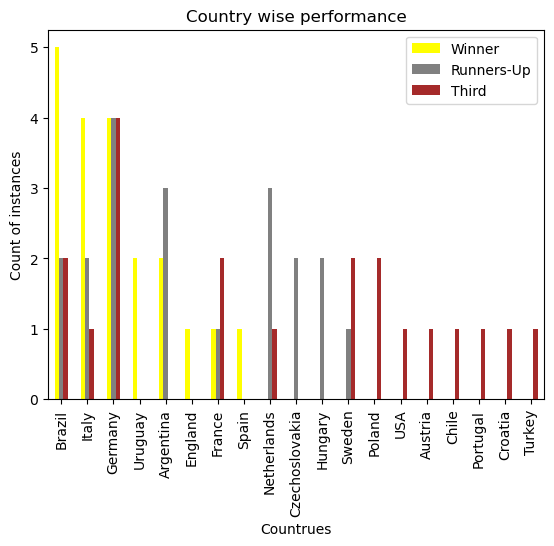

In [29]:
plt.figure(figsize=(15,8))
team_data.plot(kind='bar',x='Country',stacked=False,color=['yellow','grey','brown'])
plt.xlabel("Countrues")
plt.ylabel("Count of instances")
plt.title("Country wise performance")
plt.show()


## Total Goals scored by each coutry

In [30]:
df_matches.head()

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13-07-1930,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,...,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13-07-1930,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,...,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14-07-1930,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,...,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14-07-1930,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,...,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15-07-1930,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,...,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [31]:
home=df_matches[['Home Team Name','Home Team Goals']]
home.columns=['Country','GoalsScored']
home

,Country,GoalsScored
0,France,4
1,USA,3
2,Yugoslavia,2
3,Romania,3
4,Argentina,1
...,...,...
847,Netherlands,0
848,Brazil,1
849,Netherlands,0
850,Brazil,0


In [32]:
away=df_matches[['Away Team Name','Away Team Goals']]
away.columns=home.columns
away

,Country,GoalsScored
0,Mexico,1
1,Belgium,0
2,Brazil,1
3,Peru,1
4,France,0
...,...,...
847,Costa Rica,0
848,Germany,7
849,Argentina,0
850,Netherlands,3


In [33]:
goals=pd.concat([home,away],ignore_index=True)
goals

,Country,GoalsScored
0,France,4
1,USA,3
2,Yugoslavia,2
3,Romania,3
4,Argentina,1
...,...,...
1695,Costa Rica,0
1696,Germany,7
1697,Argentina,0
1698,Netherlands,3


In [34]:
goals_per_country=goals.groupby('Country').sum()
goals_per_country

,GoalsScored
Country,
Algeria,12
Angola,1
Argentina,133
Australia,11
Austria,43
...,...
United Arab Emirates,2
Uruguay,80
Wales,4


In [35]:
goals_per_country=goals_per_country.sort_values(by='GoalsScored',ascending=False)
goals_per_country

,GoalsScored
Country,
Germany,231
Brazil,225
Argentina,133
Italy,128
France,108
...,...
Dutch East Indies,0
China PR,0
Trinidad and Tobago,0


Germany has scored the most number of goals followed by Brazil and Argentina in the world cup history till the year 2014.


<Figure size 1000x800 with 0 Axes>

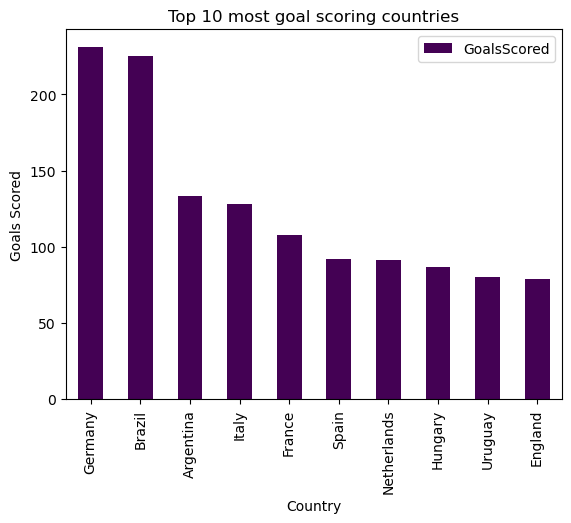

In [36]:
plt.figure(figsize=(10,8))
goals_per_country[:10].plot(kind='bar',colormap='viridis')
plt.xlabel('Country')
plt.ylabel('Goals Scored')
plt.title('Top 10 most goal scoring countries')
plt.show()

#### Tournament with the most goals

In [37]:
df_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


In [38]:
most_goals=df_cups[['Year','Country','GoalsScored']]
most_goals.head()

,Year,Country,GoalsScored
0,1930,Uruguay,70
1,1934,Italy,70
2,1938,France,84
3,1950,Brazil,88
4,1954,Switzerland,140


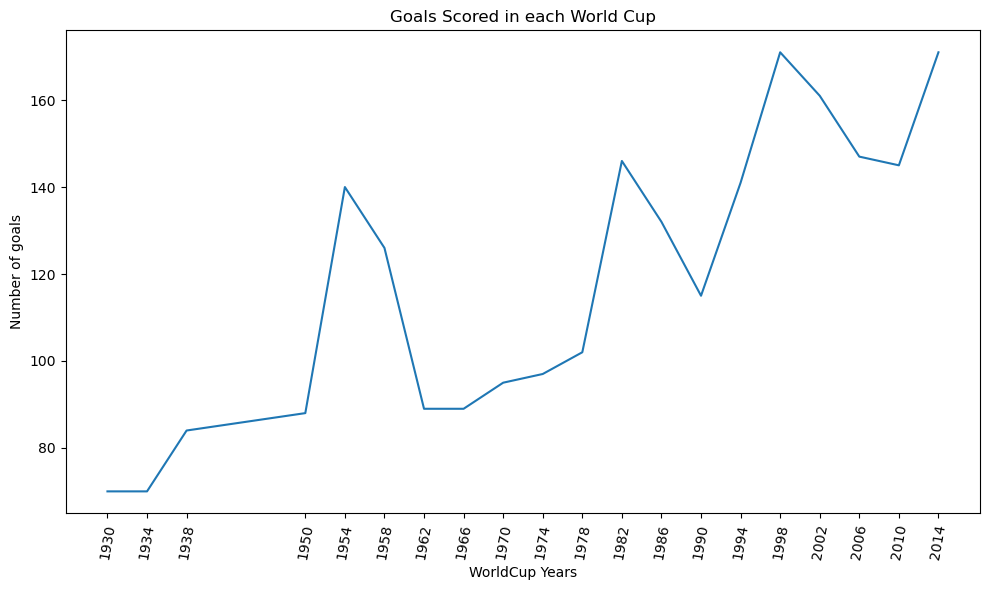

In [39]:
plt.figure(figsize=(10,6))
ax=sns.lineplot(x=most_goals['Year'],y=most_goals['GoalsScored'])
ax.set_xticks(most_goals['Year'])
ax.set_xticklabels(labels=most_goals['Year'],rotation=80)
plt.xlabel('WorldCup Years')
plt.ylabel('Number of goals')
plt.title('Goals Scored in each World Cup')
plt.tight_layout()
plt.show()

## Most Attended World Cup Finals

In [40]:
attendance=df_cups[['Year','Country','Attendance']]
attendance.head()

,Year,Country,Attendance
0,1930,Uruguay,590549
1,1934,Italy,363000
2,1938,France,375700
3,1950,Brazil,1045246
4,1954,Switzerland,768607


In [41]:
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        20 non-null     int64 
 1   Country     20 non-null     object
 2   Attendance  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 612.0+ bytes


In [42]:
most_attended=attendance.sort_values(by='Attendance',ascending=False)
most_attended[:10]

,Year,Country,Attendance
14,1994,USA,3587538
19,2014,Brazil,3386810
17,2006,Germany,3359439
18,2010,South Africa,3178856
15,1998,France,2785100
16,2002,Korea/Japan,2705197
13,1990,Italy,2516215
12,1986,Mexico,2394031
11,1982,Spain,2109723
9,1974,Germany,1865753


The 1994 World Cup hosted by USA was the most attended World Cup tournament


<Figure size 1200x800 with 0 Axes>

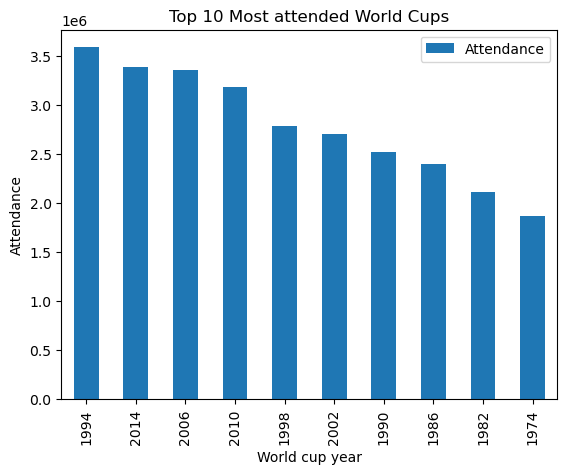

In [43]:
plt.figure(figsize=(12,8))
most_attended[:10].plot(kind='bar',x='Year',y='Attendance')
plt.xlabel('World cup year')
plt.ylabel('Attendance')
plt.title('Top 10 Most attended World Cups')
plt.show()

In [44]:
goals.head()

,Country,GoalsScored
0,France,4
1,USA,3
2,Yugoslavia,2
3,Romania,3
4,Argentina,1


In [45]:
most_matches_played=goals['Country'].value_counts()[:5]
most_matches_played

Brazil       108
Germany      108
Italy         83
Argentina     81
England       62
Name: Country, dtype: int64

Brazil and Germany have the most number of matches played that is equal to 108. Argentina having played only 81 matches have scored a lot of goals making them the third highest goal scoring country but is still far from Germany's goal tally

In [46]:
## bottle rate
df_matches.head()

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13-07-1930,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,...,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13-07-1930,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,...,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14-07-1930,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,...,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14-07-1930,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,...,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15-07-1930,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,...,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [47]:
df_matches.columns

Index(['Year', 'Date', 'Time', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [48]:
ht_homeWinners=df_matches[df_matches['Half-time Home Goals']>df_matches['Half-time Away Goals']]['Home Team Name']
ht_homeWinners

0          France
1             USA
2      Yugoslavia
3         Romania
5           Chile
          ...    
824        Brazil
831     Argentina
837      Colombia
845        Brazil
846     Argentina
Name: Home Team Name, Length: 301, dtype: object

In [49]:
ht_awayWinners=df_matches[df_matches['Half-time Home Goals']<df_matches['Half-time Away Goals']]['Away Team Name']
ht_awayWinners

17       Argentina
22         Belgium
25         Romania
42         Romania
43         Germany
          ...     
826        Germany
827    Netherlands
844        Germany
848        Germany
850    Netherlands
Name: Away Team Name, Length: 161, dtype: object

In [50]:
ht_winners=pd.concat([ht_homeWinners,ht_awayWinners],ignore_index=True)
ht_winners=pd.DataFrame(ht_winners,columns=['Country'])
ht_winners.head()


,Country
0,France
1,USA
2,Yugoslavia
3,Romania
4,Chile


In [51]:
ft_home_wins=df_matches[df_matches['Home Team Goals']>df_matches['Away Team Goals']]['Home Team Name']
ft_home_wins

0          France
1             USA
2      Yugoslavia
3         Romania
4       Argentina
          ...    
842     Argentina
843       Belgium
845        Brazil
846     Argentina
851       Germany
Name: Home Team Name, Length: 486, dtype: object

In [52]:
ft_away_wins=df_matches[df_matches['Home Team Goals']<df_matches['Away Team Goals']]['Away Team Name']
ft_away_wins

103        Germany
235       Scotland
236    Netherlands
240        Germany
246         Poland
          ...     
826        Germany
827    Netherlands
844        Germany
848        Germany
850    Netherlands
Name: Away Team Name, Length: 174, dtype: object

In [53]:
ft_winners=pd.DataFrame(pd.concat([ft_home_wins,ft_away_wins],ignore_index=True),columns=['Country'])
ft_winners.head()


,Country
0,France
1,USA
2,Yugoslavia
3,Romania
4,Argentina


In [54]:
ht_winCounts=pd.DataFrame(ht_winners.value_counts()).reset_index()
ht_winCounts.columns=['Country','Half time Wins']
ft_winCounts=pd.DataFrame(ft_winners.value_counts()).reset_index()
ft_winCounts.columns=['Country','Full time Wins']
WinStats=pd.merge(ht_winCounts,ft_winCounts,how='outer',on='Country')
WinStats.fillna(0,inplace=True)
WinStats

,Country,Half time Wins,Full time Wins
0,Germany,44.0,68.0
1,Brazil,39.0,71.0
2,Argentina,30.0,44.0
3,Italy,29.0,45.0
4,France,19.0,29.0
...,...,...,...
61,Peru,1.0,4.0
62,German DR,0.0,2.0
63,Australia,0.0,2.0
64,Norway,0.0,2.0


Germany having the highest number of half time and full time wins with Brazil and Argentina being on 2nd and 3rd position

In [55]:
## Matches that end as a draw , Can only be a group stage match.
df_matches[df_matches['Home Team Goals'] == df_matches['Away Team Goals']].shape[0]

190

In [56]:
df_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [57]:
selected_players=df_players[df_players['Line-up']=='S']
player_counts=selected_players['Player Name'].value_counts()
selection_count=pd.DataFrame({'Player Name':player_counts.index,'SelectionCount':player_counts.values})
selection_count.head(10)

,Player Name,SelectionCount
0,KLOSE,25
1,LAHM,24
2,OSCAR,23
3,M�LLER,22
4,SCHWEINSTEIGER,22
5,V. PERSIE,21
6,Uwe SEELER,21
7,Diego MARADONA,21
8,JULIO CESAR,21
9,Grzegorz LATO,20


Miroslav Klose has been selected for the World Cup squad the highest number of times 2014 World Cup Final being his last International appearance.

This Dataset contains the information only uptil the year 2014. 2018 World Cup was hosted by Russia in which France won their 2nd World Cup title with Croatia as runners up, Belgium securing the third position and England coming on 4th. 

2022 World Cup was hosted in Qatar in which Argentina won their 3rd WorldCup title, with France as runners-up, Croatia securing the 3rd place and Morocco on 4th.

In [58]:
selection_count[selection_count['Player Name']=='MESSI']

,Player Name,SelectionCount
34,MESSI,17


Lionel Messi => (GOAT) made his 17th appearance in the 2014 WorldCup Final. In his 26th World Cup appearance in 2022 World Cup final in Qatar he won his first ever World Cup for his nation Argentina 